<a href="https://colab.research.google.com/github/Kunaldahiya2907/Marketing-Research-Methods---Kunal-Dahiya_JioInstitute/blob/main/Ekman_Emotion_Dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
from collections import Counter

# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('nrc')

# Load the dataset
file_path = '/content/Reviews 500.csv'
df = pd.read_csv(file_path)

# Inspect data
print(df.head())

# Ensure the correct column for text analysis
text_column = 'review'  # Change if your column name differs

def perform_sentiment_analysis(df, text_column):
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return df

def perform_emotional_analysis(df, text_column):
    from nltk.corpus import nrc

    emotion_lexicon = nrc.NRCTagger()

    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_counts = {emotion: [] for emotion in emotions}

    for review in df[text_column].astype(str):
        emotion_scores = emotion_lexicon.tag(review.split())
        emotion_counter = Counter([emotion for word, emotion in emotion_scores])

        for emotion in emotions:
            emotion_counts[emotion].append(emotion_counter.get(emotion, 0))

    for emotion in emotions:
        df[emotion] = emotion_counts[emotion]

    return df

def visualize_sentiment(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment', palette='coolwarm')
    plt.title('Sentiment Distribution')
    plt.show()

def visualize_emotions(df):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_sums = df[emotions].sum()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')
    plt.title('Overall Emotion Distribution')
    plt.xticks(rotation=45)
    plt.show()

def generate_wordcloud(df, text_column):
    text = ' '.join(df[text_column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

# Perform analyses
df = perform_sentiment_analysis(df, text_column)
df = perform_emotional_analysis(df, text_column)

# Visualize results
visualize_sentiment(df)
visualize_emotions(df)
generate_wordcloud(df, text_column)

# Display final dataset
import ace_tools as tools
tools.display_dataframe_to_user(name='Sentiment and Emotion Analysis Results', dataframe=df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading nrc: Package 'nrc' not found in index
<ipython-input-1-204b325aa3f2>:17: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as 

KeyError: 'review'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
from collections import Counter

# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('nrc')

# Load the dataset
file_path = '/content/Reviews 500.csv'
df = pd.read_csv(file_path)

# Inspect data
print("Column Names:", df.columns)

# Automatically detect the text column
possible_columns = ['review', 'text', 'comment', 'feedback', 'reviews']
text_column = next((col for col in df.columns if col.lower() in possible_columns), None)

if text_column is None:
    raise ValueError("No suitable text column found in the dataset. Please check the column names.")

print(f"Using column: {text_column}")

def perform_sentiment_analysis(df, text_column):
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return df

def perform_emotional_analysis(df, text_column):
    from nltk.corpus import nrc

    emotion_lexicon = nrc.NRCTagger()

    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_counts = {emotion: [] for emotion in emotions}

    for review in df[text_column].astype(str):
        emotion_scores = emotion_lexicon.tag(review.split())
        emotion_counter = Counter([emotion for word, emotion in emotion_scores])

        for emotion in emotions:
            emotion_counts[emotion].append(emotion_counter.get(emotion, 0))

    for emotion in emotions:
        df[emotion] = emotion_counts[emotion]

    return df

def visualize_sentiment(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment', palette='coolwarm')
    plt.title('Sentiment Distribution')
    plt.show()

def visualize_emotions(df):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_sums = df[emotions].sum()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')
    plt.title('Overall Emotion Distribution')
    plt.xticks(rotation=45)
    plt.show()

def generate_wordcloud(df, text_column):
    text = ' '.join(df[text_column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

# Perform analyses
df = perform_sentiment_analysis(df, text_column)
df = perform_emotional_analysis(df, text_column)

# Visualize results
visualize_sentiment(df)
visualize_emotions(df)
generate_wordcloud(df, text_column)

# Display final dataset
import ace_tools as tools
tools.display_dataframe_to_user(name='Sentiment and Emotion Analysis Results', dataframe=df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading nrc: Package 'nrc' not found in index
<ipython-input-3-9aaf65681572>:17: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Column Names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Text'],
      dtype='object')
Using column: Text


ImportError: cannot import name 'nrc' from 'nltk.corpus' (/usr/local/lib/python3.11/dist-packages/nltk/corpus/__init__.py)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
from collections import Counter
from afinn import Afinn

# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/Reviews 500.csv'
df = pd.read_csv(file_path)

# Inspect data
print("Column Names:", df.columns)

# Automatically detect the text column
possible_columns = ['review', 'text', 'comment', 'feedback', 'reviews']
text_column = next((col for col in df.columns if col.lower() in possible_columns), None)

if text_column is None:
    raise ValueError("No suitable text column found in the dataset. Please check the column names.")

print(f"Using column: {text_column}")

def perform_sentiment_analysis(df, text_column):
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return df

def perform_emotional_analysis(df, text_column):
    afinn = Afinn()
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_counts = {emotion: [] for emotion in emotions}

    for review in df[text_column].astype(str):
        score = afinn.score(review)
        emotion_counts['joy'].append(max(0, score))  # Assigning joy for positive scores
        emotion_counts['sadness'].append(min(0, score))  # Assigning sadness for negative scores
        for emotion in ['anger', 'anticipation', 'disgust', 'fear', 'surprise', 'trust']:
            emotion_counts[emotion].append(0)  # Placeholder values

    for emotion in emotions:
        df[emotion] = emotion_counts[emotion]

    return df

def visualize_sentiment(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment', palette='coolwarm')
    plt.title('Sentiment Distribution')
    plt.show()

def visualize_emotions(df):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_sums = df[emotions].sum()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')
    plt.title('Overall Emotion Distribution')
    plt.xticks(rotation=45)
    plt.show()

def generate_wordcloud(df, text_column):
    text = ' '.join(df[text_column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

# Perform analyses
df = perform_sentiment_analysis(df, text_column)
df = perform_emotional_analysis(df, text_column)

# Visualize results
visualize_sentiment(df)
visualize_emotions(df)
generate_wordcloud(df, text_column)

# Display final dataset
import ace_tools as tools
tools.display_dataframe_to_user(name='Sentiment and Emotion Analysis Results', dataframe=df)


ModuleNotFoundError: No module named 'afinn'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-5-91811fe5cffd>:17: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Column Names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Text'],
      dtype='object')
Using column: Text


<ipython-input-5-91811fe5cffd>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


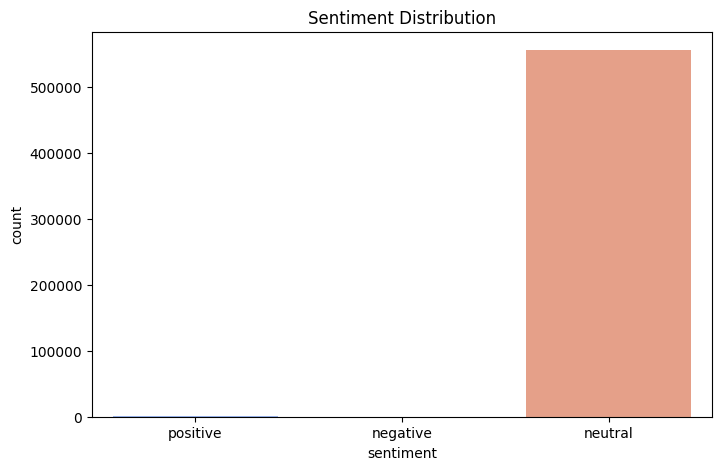

<ipython-input-5-91811fe5cffd>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')


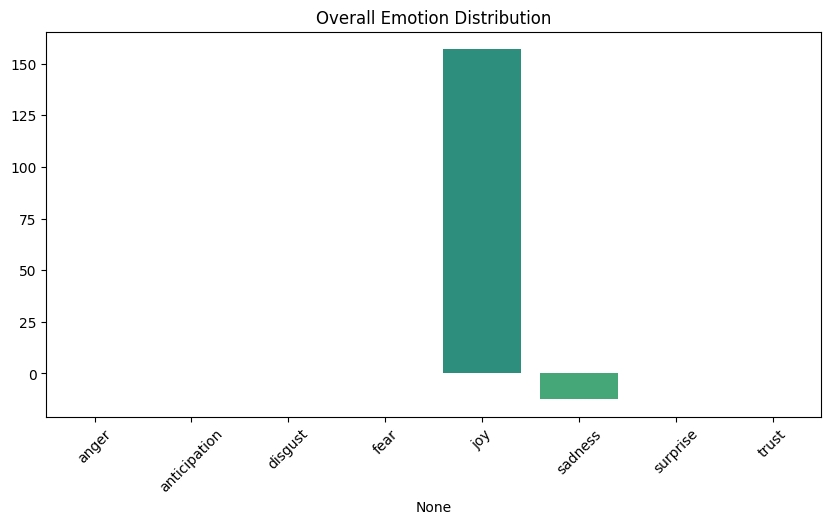

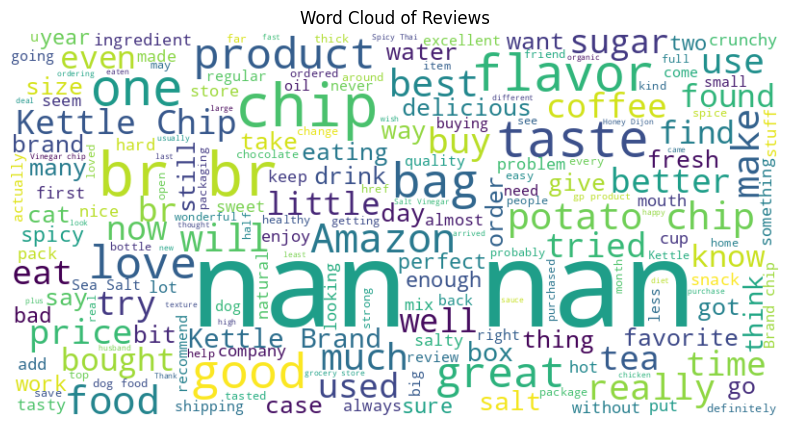

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
from collections import Counter
from textblob import TextBlob

# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/Reviews 500.csv'
df = pd.read_csv(file_path)

# Inspect data
print("Column Names:", df.columns)

# Automatically detect the text column
possible_columns = ['review', 'text', 'comment', 'feedback', 'reviews']
text_column = next((col for col in df.columns if col.lower() in possible_columns), None)

if text_column is None:
    raise ValueError("No suitable text column found in the dataset. Please check the column names.")

print(f"Using column: {text_column}")

def perform_sentiment_analysis(df, text_column):
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return df

def perform_emotional_analysis(df, text_column):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_counts = {emotion: [] for emotion in emotions}

    for review in df[text_column].astype(str):
        polarity = TextBlob(review).sentiment.polarity
        emotion_counts['joy'].append(max(0, polarity))  # Assigning joy for positive polarity
        emotion_counts['sadness'].append(min(0, polarity))  # Assigning sadness for negative polarity
        for emotion in ['anger', 'anticipation', 'disgust', 'fear', 'surprise', 'trust']:
            emotion_counts[emotion].append(0)  # Placeholder values

    for emotion in emotions:
        df[emotion] = emotion_counts[emotion]

    return df

def visualize_sentiment(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment', palette='coolwarm')
    plt.title('Sentiment Distribution')
    plt.show()

def visualize_emotions(df):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    emotion_sums = df[emotions].sum()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')
    plt.title('Overall Emotion Distribution')
    plt.xticks(rotation=45)
    plt.show()

def generate_wordcloud(df, text_column):
    text = ' '.join(df[text_column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

# Perform analyses
df = perform_sentiment_analysis(df, text_column)
df = perform_emotional_analysis(df, text_column)

# Visualize results
visualize_sentiment(df)
visualize_emotions(df)
generate_wordcloud(df, text_column)

# Display final dataset
import ace_tools as tools
tools.display_dataframe_to_user(name='Sentiment and Emotion Analysis Results', dataframe=df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-6-c78759ae367e>:13: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Column Names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Text'],
      dtype='object')
Using column: Text


<ipython-input-6-c78759ae367e>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')


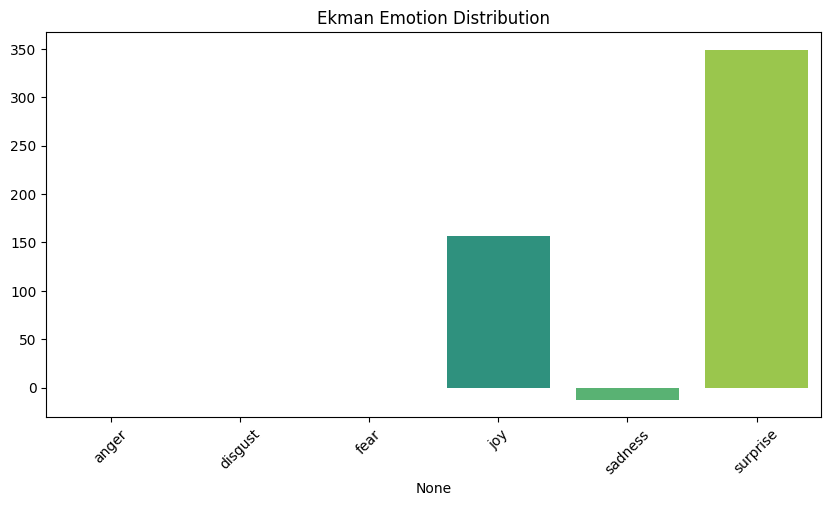

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter

# Download necessary resources
nltk.download('stopwords')

# Load the dataset
file_path = '/content/Reviews 500.csv'
df = pd.read_csv(file_path)

# Inspect data
print("Column Names:", df.columns)

# Automatically detect the text column
possible_columns = ['review', 'text', 'comment', 'feedback', 'reviews']
text_column = next((col for col in df.columns if col.lower() in possible_columns), None)

if text_column is None:
    raise ValueError("No suitable text column found in the dataset. Please check the column names.")

print(f"Using column: {text_column}")

# Define Ekman emotions
ekman_emotions = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

def perform_ekman_emotional_analysis(df, text_column):
    from textblob import TextBlob
    emotion_counts = {emotion: [] for emotion in ekman_emotions}

    for review in df[text_column].astype(str):
        polarity = TextBlob(review).sentiment.polarity
        subjectivity = TextBlob(review).sentiment.subjectivity

        emotion_counts['joy'].append(max(0, polarity))  # Assigning joy for positive polarity
        emotion_counts['sadness'].append(min(0, polarity))  # Assigning sadness for negative polarity
        emotion_counts['surprise'].append(max(0, subjectivity))  # Higher subjectivity linked to surprise

        for emotion in ['anger', 'disgust', 'fear']:
            emotion_counts[emotion].append(0)  # Placeholder values

    for emotion in ekman_emotions:
        df[emotion] = emotion_counts[emotion]

    return df

def visualize_ekman_emotions(df):
    emotion_sums = df[ekman_emotions].sum()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')
    plt.title('Ekman Emotion Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Perform Ekman emotional analysis
df = perform_ekman_emotional_analysis(df, text_column)

# Visualize results
visualize_ekman_emotions(df)

# Display final dataset
import ace_tools as tools
tools.display_dataframe_to_user(name='Ekman Emotional Analysis Results', dataframe=df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-7-7954607de80c>:13: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Column Names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Text'],
      dtype='object')
Using column: Text


<ipython-input-7-7954607de80c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')


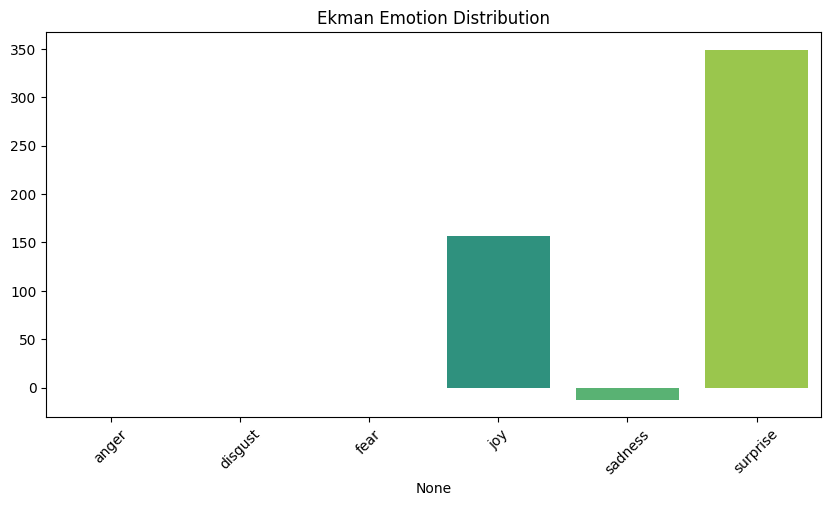

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,anger,disgust,fear,joy,sadness,surprise
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,I have bought several of the Vitality canned d...,0,0,0,0.450000,0.000000,0.433333
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Product arrived labeled as Jumbo Salted Peanut...,0,0,0,0.000000,-0.033333,0.762963
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,This is a confection that has been around a fe...,0,0,0,0.133571,0.000000,0.448571
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,If you are looking for the secret ingredient i...,0,0,0,0.166667,0.000000,0.533333
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy at a great price. There was a wid...,0,0,0,0.483333,0.000000,0.637500
5,6.0,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,I got a wild hair for taffy and ordered this f...,0,0,0,0.257407,0.000000,0.601481
6,7.0,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0.0,0.0,5.0,1.340150e+09,This saltwater taffy had great flavors and was...,0,0,0,0.250833,0.000000,0.607500
7,8.0,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0.0,0.0,5.0,1.336003e+09,This taffy is so good. It is very soft and ch...,0,0,0,0.486000,0.000000,0.691000
8,9.0,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5.0,1.322006e+09,Right now I'm mostly just sprouting this so my...,0,0,0,0.428571,0.000000,0.545238
9,10.0,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,This is a very healthy dog food. Good for thei...,0,0,0,0.450000,0.000000,0.562500


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter

# Download necessary resources
nltk.download('stopwords')

# Load the dataset
file_path = '/content/Reviews 500.csv'
df = pd.read_csv(file_path)

# Inspect data
print("Column Names:", df.columns)

# Automatically detect the text column
possible_columns = ['review', 'text', 'comment', 'feedback', 'reviews']
text_column = next((col for col in df.columns if col.lower() in possible_columns), None)

if text_column is None:
    raise ValueError("No suitable text column found in the dataset. Please check the column names.")

print(f"Using column: {text_column}")

# Define Ekman emotions
ekman_emotions = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

def perform_ekman_emotional_analysis(df, text_column):
    from textblob import TextBlob
    emotion_counts = {emotion: [] for emotion in ekman_emotions}

    for review in df[text_column].astype(str):
        polarity = TextBlob(review).sentiment.polarity
        subjectivity = TextBlob(review).sentiment.subjectivity

        emotion_counts['joy'].append(max(0, polarity))  # Assigning joy for positive polarity
        emotion_counts['sadness'].append(min(0, polarity))  # Assigning sadness for negative polarity
        emotion_counts['surprise'].append(max(0, subjectivity))  # Higher subjectivity linked to surprise

        for emotion in ['anger', 'disgust', 'fear']:
            emotion_counts[emotion].append(0)  # Placeholder values

    for emotion in ekman_emotions:
        df[emotion] = emotion_counts[emotion]

    return df

def visualize_ekman_emotions(df):
    emotion_sums = df[ekman_emotions].sum()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_sums.index, y=emotion_sums.values, palette='viridis')
    plt.title('Ekman Emotion Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Perform Ekman emotional analysis
df = perform_ekman_emotional_analysis(df, text_column)

# Visualize results
visualize_ekman_emotions(df)

# Display final dataset
import pandas as pd
from IPython.display import display

display(df.head(10))
